# Throw the dice

In [1]:
import numpy as np

In [2]:
np.random.choice(np.arange(1, 7), 10)

array([2, 1, 5, 6, 4, 2, 2, 1, 1, 4])

In [3]:
np.random.choice(np.arange(1, 7), 10, replace=True) # By default "replace" is "True"

array([6, 1, 5, 3, 6, 2, 5, 5, 6, 4])

In [4]:
np.random.choice(np.arange(1, 7), 5, replace=False)

array([2, 5, 3, 4, 6])

In [5]:
p = np.array([1, 1, 1, 3, 3, 3]); p = p / np.sum(p)
np.random.choice(np.arange(1, 7), 10, p = p)

array([4, 4, 4, 4, 6, 6, 4, 4, 5, 4])

# Expected value and Variance

In [6]:
import numpy as np

#### 正規分布

np.random.normal(loc = 0.0, scale = 1.0, size = None)

オプションのlocは期待値，scaleは標準偏差，sizeはサンプル数

#### 標準正規分布

np.random.randn(d0, d1, d2, ...)

標準正規分布は，期待値0, 分散1の正規分布．(d0, d1, d2, ...) のサイズの配列に，標準正規分布からのサンプルを格納

#### 一様分布

np.random.uniform(low = 0.0, high = 1.0, size = None)

オプションのlowは最小値，highは最大値，sizeはサンプル数

#### 区間[0, 1]上の一様分布

np.random.rand(d0, d1, d2, ...)

(d0, d1, d2, ...) のサイズの配列に，区間[0, 1]上の一様分布からのサンプルを格納

In [7]:
x = np.random.normal(1, 2, 100) # np.random.normal(loc, scale, size)

In [8]:
x.mean()   # Same as "np.mean(x)"

1.0945844885302138

In [9]:
np.mean(x) # Same as "x.mean()"

1.0945844885302138

In [10]:
x.std()    # Same as "np.std()"

2.0143570849641943

In [11]:
np.std(x)  # Same as "x.std()"

2.0143570849641943

$|x−E[x]|\leq \mathrm{sd}(x)$となるデータの割合を求めます．

In [12]:
np.mean(np.abs(x - np.mean(x)) <= np.std(x))

0.64

$| x - E[x] | \leq 2 \times \mathrm{sd}(x) $となるデータの割合を求めます．

In [13]:
np.mean(np.abs(x - np.mean(x)) <= 2 * np.std(x))

0.97

# Quantile

In [14]:
import scipy as sp
from scipy.stats import norm

標準正規分布$N(0, 1)$ の上側 $\alpha$ を $z_{\alpha}$ と表す．

sp.stats.norm.ppf

を使うと正規分布の分位点（Quantile）$z_{\alpha}$を計算できる．

$N(0, 1)$の0.7点

In [15]:
sp.stats.norm.ppf(0.7)

0.5244005127080407

$N(1, 2^2)$ の0.7点

In [16]:
sp.stats.norm.ppf(0.7, loc = 1, scale = 2)

2.0488010254160813

$N(0, 1)$の上側0.05点

In [17]:
alpha = 0.05
sp.stats.norm.ppf(1 - alpha)

1.6448536269514722

# Covariance and Correlation coefficient

In [18]:
import numpy as np
from sklearn.datasets import load_iris

In [19]:
iris = load_iris()
iris.data.shape    # number of data, dimension

(150, 4)

In [20]:
# Variance-covariance matrix (Transposition of data matrix)

In [21]:
np.cov(iris.data.T)

array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

In [22]:
# Correlation coefficient matrix (Transposition of data matrix)

In [23]:
np.corrcoef(iris.data.T)

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

# Loss function, Training error and Test error

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

パラメータ範囲の設定

In [25]:
par = np.linspace(-3,3,50)

テスト誤差の設定

In [26]:
te_err = (1+par**2)/2

テスト誤差のプロット

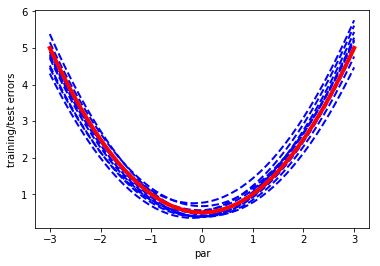

In [27]:
for i in range(10):
    # データを生成
    z = np.random.normal(size=20)
    # トレーニング誤差
    trerr = np.mean(np.subtract.outer(z,par)**2/2, axis=0)
    plt.plot(par,trerr,'b--',linewidth=2)

# 描画の準備
plt.xlabel("par")
plt.ylabel("training/test errors")
plt.plot(par, te_err,'r-',linewidth=4) # テスト誤差をプロット
plt.show() # 描画

# Estimation of test error by cross validation method

In [28]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [29]:
from sklearn.tree import DecisionTreeRegressor
n, K = 100, 10                   # 設定：データ数100, 10重CV.
# データ生成 
x = np.random.uniform(-2,2,n)    # 区間[-2,2]上の一様分布
y = np.sin(2*np.pi*x)/x + np.random.normal(scale=0.5,size=n)
# データをグループ分け 
cv_idx = np.tile(np.arange(K), int(np.ceil(n/K)))[:n]    
maxdepths = np.arange(2,10)      # 決定木の深さの候補
cverr = np.array([])
for mp in maxdepths:
    cverr_lambda = np.array([])
    for k in range(K):  
        tr_idx = (cv_idx!=k) 
        te_idx = (cv_idx==k) 
        cvx = x[tr_idx]; cvy = y[tr_idx]   # CVのためデータを分割
        dtreg = DecisionTreeRegressor(max_depth=mp)
        dtreg.fit(np.array([cvx]).T, cvy)               # 決定木で推定
        ypred = dtreg.predict(np.array([x[te_idx]]).T)  # 予測
        # CV誤差の計算
        cl = np.append(cverr_lambda, np.mean((y[te_idx]-ypred)**2/2))
    cverr = np.append(cverr, np.mean(cl))

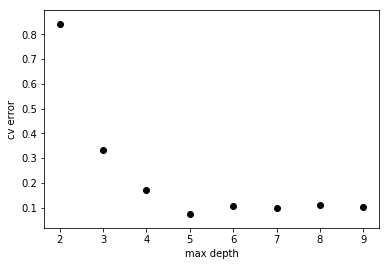

In [30]:
plt.scatter(maxdepths, cverr,c='k')  # cv誤差のプロット
plt.xlabel("max depth"); plt.ylabel('cv error')
plt.show()

In [31]:
# データ生成
n = 100                                     # データ数
x = np.random.uniform(-2, 2, n)             # 区間[-2, 2]上の一様分布
y = np.sin(2*np.pi*x)/x + np.random.normal(scale=0.5,size=n)
tx = np.linspace(-2, 2, 100)                # 予測点
maxdepths = np.arange([5, 9])               # 決定木の深さの候補
for mp in maxdepths:
    dtreg = DecisionTreeRegressor(max_depth = mp)
    dtreg.fit(np.array([x]).T, y)           # 決定木で推定
    ypred = dtreg.predict(np.array([tx].T)  # 予測
    # 予測値のプロット
    plt.plot(tx, ypred, lw=1, label='max_depth: '+str(mp))

# 真の関数のプロット
plt.plot(tx,np.sin(2 * np.pi*tx) / tx, 'r--', lw = 2, label = 'true function')

# データ点のプロット
plt.scatter(x, y, c = 'k')
plt.legend()
plt.show()

SyntaxError: invalid syntax (<ipython-input-31-5b3f0fa95d51>, line 12)